# Dataset generation

## 1. Import

In [31]:
import numpy as np
import networkx as nx
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from ortools.constraint_solver import pywrapcp, routing_enums_pb2

## 2. Utils

In [32]:
def draw(graph, ax):
    """
    Draws the graph as a matplotlib plot.
    Depots are colored in red. Edges that have been
    traveresed
    """

    # draw nodes according to color and position attribute
    pos = nx.get_node_attributes(graph, "coordinates")
    nx.draw_networkx_nodes(
        graph, pos, ax=ax, node_size=100
    )


    labels_pos = {k: (v + np.array([0, 0.03])) for k, v in pos.items()}
    nx.draw_networkx_labels(
        G, labels_pos, ax=ax
    )

def generate_graph(num_nodes):
    G = nx.complete_graph(n)
    node_position = {
        i: coordinates for i, coordinates in enumerate(np.random.rand(num_nodes, 2))
    }
    nx.set_node_attributes(G, node_position, "coordinates")

    return G

## 3. Generating Distance Matrices

In [33]:
n = 10
G = nx.complete_graph(n)
node_position = {
    i: coordinates for i, coordinates in enumerate(np.random.rand(n, 2))
}
nx.set_node_attributes(G, node_position, "coordinates")

positions = np.array([node_position[index] for index in range(n)])
distances = 10000*cdist(positions, positions)

In [34]:
#X = X.reshape((N,M*M))

## 4. Building Solutions

In [44]:
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2

# Distance callback


def create_distance_callback(dist_matrix):
    # Create a callback to calculate distances between cities.

    def distance_callback(from_node, to_node):
        return int(dist_matrix[from_node][to_node])

    return distance_callback


def main():
    # Distance matrix
    dist_matrix = distances

    tsp_size = 10
    num_vehicles = 1
    depot = 0

    # Create routing model
    if tsp_size > 0:
        manager = pywrapcp.RoutingIndexManager(tsp_size, num_vehicles, depot)
        routing = pywrapcp.RoutingModel(manager)
        search_parameters = pywrapcp.DefaultRoutingSearchParameters()
        search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
        # Create the distance callback.
        dist_callback = create_distance_callback(dist_matrix)
        transit_callback_index = routing.RegisterTransitCallback(dist_callback)
        routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)
        # Solve the problem.
        assignment = routing.SolveWithParameters(search_parameters)
        if assignment:
            # Solution distance.
            print("Total distance: " +
                  str(assignment.ObjectiveValue()) + " miles\n")
            # Display the solution.
            # Only one route here; otherwise iterate from 0 to routing.vehicles() - 1
            route_number = 0
            # Index of the variable for the starting node.
            index = routing.Start(route_number)
            route = ''
            while not routing.IsEnd(index):
                # Convert variable indices to node indices in the displayed route.
                route += str(index) + ' -> '
                index = assignment.Value(routing.NextVar(index))
            route += str(depot)
            print("Route:\n\n" + route)
        else:
            print('No solution found.')
    else:
        print('Specify an instance greater than 0.')

main()

Total distance: 0 miles

Route:

0 -> 9 -> 5 -> 4 -> 2 -> 7 -> 6 -> 3 -> 8 -> 1 -> 0


In [36]:
distances

array([[   0.        , 5003.90547807, 4800.07006747, 2584.29571414,
        4536.83007624, 1768.31652438, 7667.43663547, 5172.83314246,
        4576.10015857, 3502.04148353],
       [5003.90547807,    0.        , 3682.45045361, 6705.66400333,
        3526.06219121, 3411.31023709, 7635.54246975, 5049.72731036,
        1307.52566293, 4117.48183483],
       [4800.07006747, 3682.45045361,    0.        , 4902.37365658,
         276.2938446 , 3249.01685902, 3994.90231102, 1387.01319138,
        2375.51048865, 1497.24329509],
       [2584.29571414, 6705.66400333, 4902.37365658,    0.        ,
        4722.1366273 , 3372.51736391, 6334.37579875, 4540.37274867,
        5842.08731921, 3416.10179752],
       [4536.83007624, 3526.06219121,  276.2938446 , 4722.1366273 ,
           0.        , 2973.79509615, 4205.02764169, 1524.15393527,
        2220.13095924, 1306.03774504],
       [1768.31652438, 3411.31023709, 3249.01685902, 3372.51736391,
        2973.79509615,    0.        , 6659.92510644, 3946

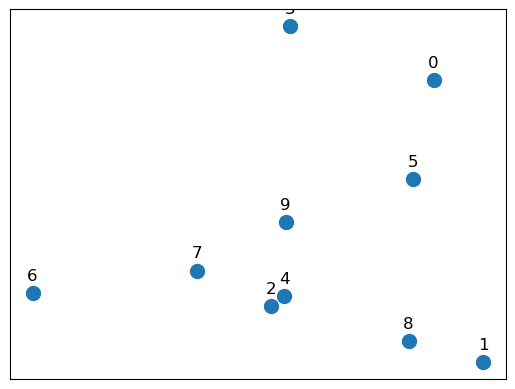

In [37]:
fig, ax = plt.subplots()
draw(G, ax)